In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

In [48]:
def load_data(filename):
  df = pd.read_csv(filename, low_memory = False)
  data = df.shape
  print(f'Data Shape : {data}')
  return df
    

In [49]:
filename = '../Dataset/credit_risk_dataset_week_2_ML_Process.csv'
data = load_data(filename)

Data Shape : (32581, 12)


In [50]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Split Input Output

In [51]:
def split_input_output(data, target_column):
  X = data.drop(target_column, axis = 1)
  y = data[target_column]
  print(f'Original Data Shape : {data.shape}')
  print(f'X Data Shape : {X.shape}')
  print(f'y Data Shape : {y.shape}')
  return X, y

In [52]:
X,y = split_input_output(data, 'loan_status')

Original Data Shape : (32581, 12)
X Data Shape : (32581, 11)
y Data Shape : (32581,)


Train Test Split

In [53]:
def split_train_test(X, y, test_size, random_state):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state =random_state, stratify=y)
  print(f'X_train Shape : {X_train.shape}')
  print(f'X_test Shape : {X_test.shape}')
  print(f'y_train Shape : {y_train.shape}')
  print(f'y_test Shape : {y_test.shape}')
  return X_train, X_test, y_train, y_test

In [54]:
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size = 0.2, random_state = 42)

X_train Shape : (26064, 11)
X_test Shape : (6517, 11)
y_train Shape : (26064,)
y_test Shape : (6517,)


In [55]:
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size = 0.5, random_state = 42)

X_train Shape : (3258, 11)
X_test Shape : (3259, 11)
y_train Shape : (3258,)
y_test Shape : (3259,)


Serialize Data

In [56]:
def serialize_data(data, path):
  joblib.dump(data, path)

In [57]:
directory = '../data/processed/'   # change file directory accordingly

serialize_data(X_train, directory +'X_train.pkl')
serialize_data(X_valid, directory +'X_valid.pkl')
serialize_data(X_test,  directory +'X_test.pkl')
serialize_data(y_train, directory +'y_train.pkl')
serialize_data(y_valid, directory +'y_valid.pkl')
serialize_data(y_test,  directory +'y_test.pkl')

Deserialized Data

In [58]:
def deserialize_data(path):
  data = joblib.load(path)
  return data

EDA

In [59]:
%cd ../src

c:\Users\Admin\Documents\project\Hisyam\CreditRisk\src


c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [62]:
import utils 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
X_TRAIN_PATH = '../data/processed/X_train.pkl' 
Y_TRAIN_PATH = '../data/processed/y_train.pkl' 

X_train = utils.deserialize_data(X_TRAIN_PATH)
y_train = utils.deserialize_data(Y_TRAIN_PATH)

In [64]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [65]:
num_cols = ['person_age','person_income','person_emp_length','loan_amnt',
            'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In terms of variable’s data type, everything seems to be in accordance hence alteration is not required

In [67]:
# create into a dataframe to display the total null and null percentages

def null_values(data):

    # Calculate null values and null percentages
    null_values = data.isnull().sum()
    null_percentage = (data.isnull().sum() / len(data) * 100).round(2)

    # Create a dictionary with the results
    null_dict = {
        'column': null_values.index,
        'null_values': null_values.values,
        'null_percentage': null_percentage.values
    }

    # Create a DataFrame using the dictionary
    null_df = pd.DataFrame(null_dict)

    return null_df

In [68]:
null_values(X_train)

,column,null_values,null_percentage
0,person_age,0,0.00
1,person_income,0,0.00
2,person_home_ownership,0,0.00
3,person_emp_length,738,2.83
4,loan_intent,0,0.00
5,loan_grade,0,0.00
6,loan_amnt,0,0.00
7,loan_int_rate,2501,9.60
8,loan_percent_income,0,0.00
9,cb_person_default_on_file,0,0.00


In [69]:
X_train[X_train.duplicated(keep = False)].sort_values(['person_income'],ascending= False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27881,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9
28770,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9
29160,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
27677,35,160000,OWN,10.0,VENTURE,B,24000,11.83,0.15,N,9
...,...,...,...,...,...,...,...,...,...,...,...
18261,32,18000,OWN,0.0,VENTURE,A,4750,7.88,0.26,N,6
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4


We should remove the duplicated rows and keep the first records.

In [70]:
def null_values(data):

    # Calculate null values and null percentages
    null_values = data.isnull().sum()
    null_percentage = (data.isnull().sum() / len(data) * 100).round(2)

    # Create a dictionary with the results
    null_dict = {
        'column': null_values.index,
        'null_values': null_values.values,
        'null_percentage': null_percentage.values
    }

    # Create a DataFrame using the dictionary
    null_df = pd.DataFrame(null_dict)

    return null_df

In [71]:
null_values(X_train)

,column,null_values,null_percentage
0,person_age,0,0.00
1,person_income,0,0.00
2,person_home_ownership,0,0.00
3,person_emp_length,738,2.83
4,loan_intent,0,0.00
5,loan_grade,0,0.00
6,loan_amnt,0,0.00
7,loan_int_rate,2501,9.60
8,loan_percent_income,0,0.00
9,cb_person_default_on_file,0,0.00


* *We may remove the **"person_emp_length"** due to variable null percentage is less than 5% from the total data length*
* *the rest of **"loan_int_rate"** may be filled with statistical approach*

In [72]:
X_train_ =['person_age','person_income','person_emp_length','loan_amnt',
            'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

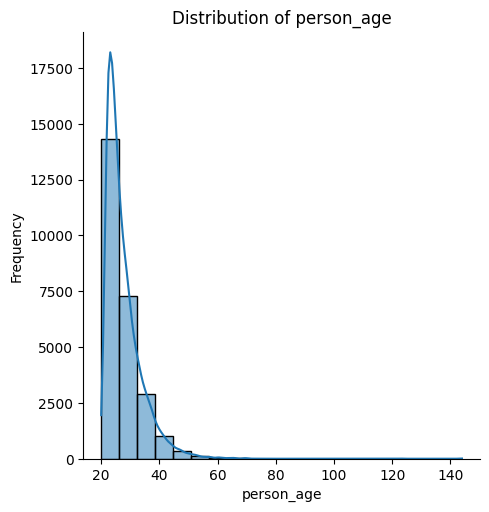

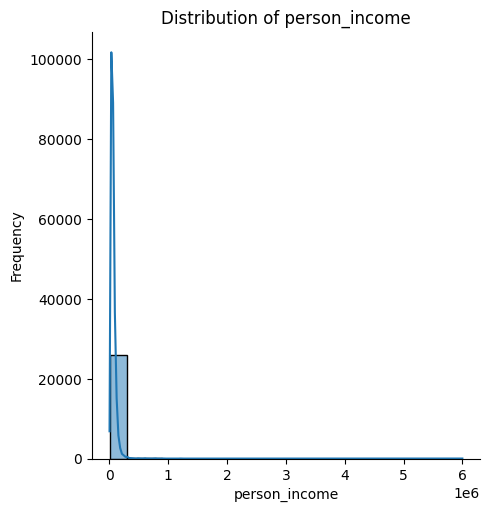

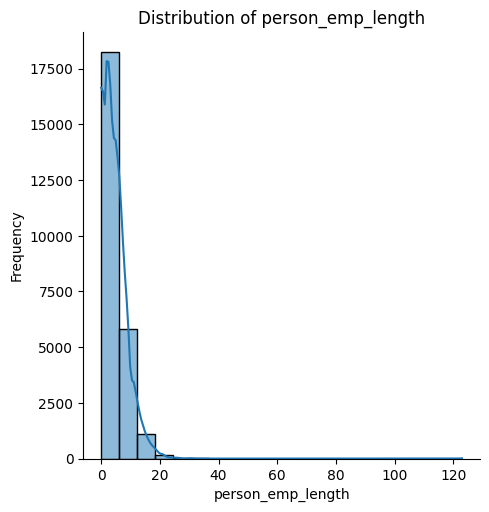

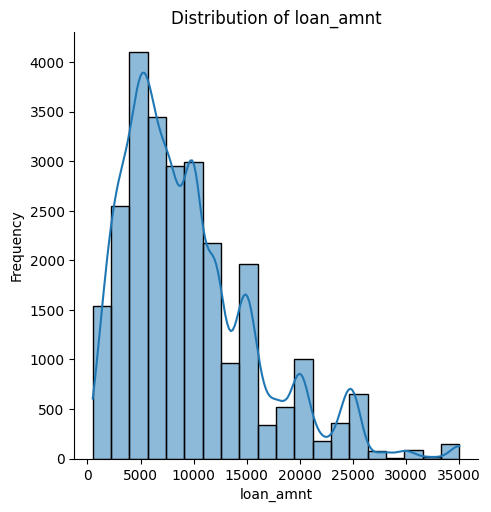

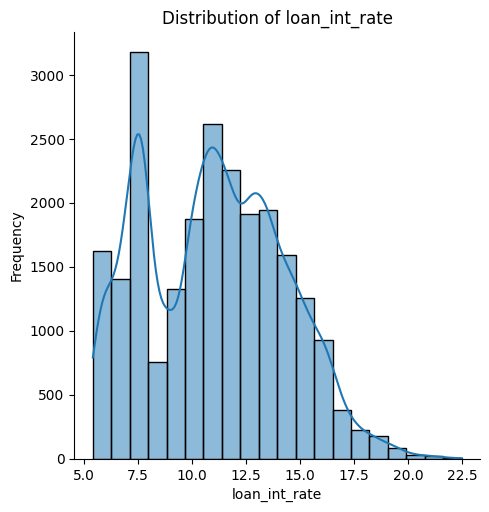

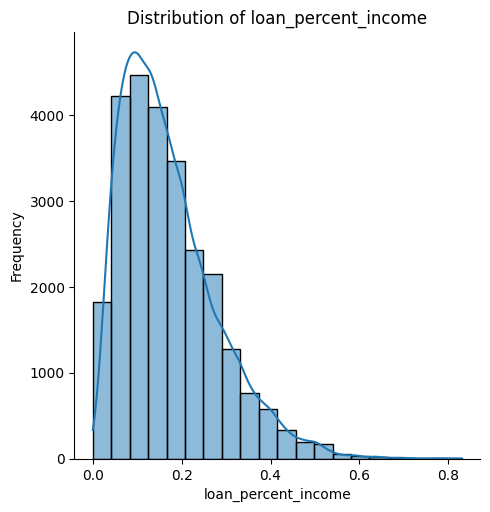

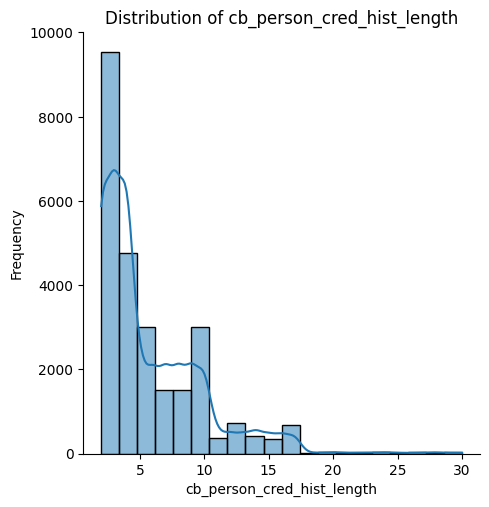

In [73]:
for col in X_train_:
  sns.displot(X_train[col], bins = 20, kde = True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

2 variables contain null values (person_emp_length and loan_int_rate) both have tendencies of right skewed, therefore statistical imputation would be probable such as mean or median imputation 

<function matplotlib.pyplot.show(close=None, block=None)>

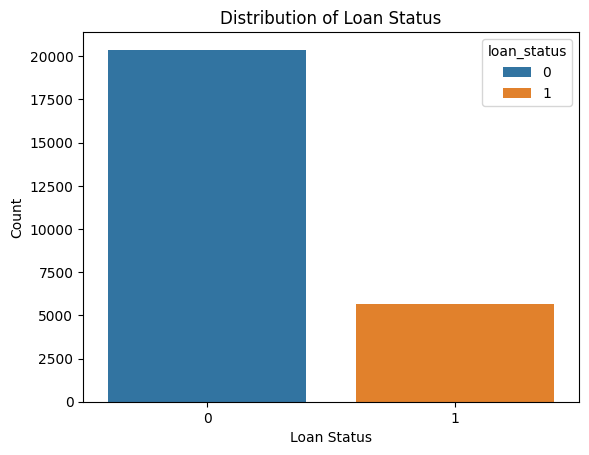

In [74]:
sns.countplot(data = pd.DataFrame(y_train) , x = 'loan_status', hue = 'loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show

The target variable is imbalance which will cause machine learning models may become biased in their predictions as a result, favoring the majority class. Techniques like oversampling the minority class or undersampling the majority class are used in resampling to compensate this. 

Data Preprocessing

In [75]:
from copy import deepcopy

from sklearn.preprocessing import OneHotEncoder

In [76]:
PATH = '../data/processed/'

X_train = utils.deserialize_data(PATH +'X_train.pkl')
X_test = utils.deserialize_data(PATH +'X_test.pkl')
X_valid = utils.deserialize_data(PATH +'X_valid.pkl')

y_train = utils.deserialize_data(PATH +'y_train.pkl')
y_test = utils.deserialize_data(PATH +'y_test.pkl')
y_valid = utils.deserialize_data(PATH +'y_valid.pkl')

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [78]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 26064 entries, 15884 to 17068
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
26064 non-null  int64
dtypes: int64(1)
memory usage: 407.2 KB


In [79]:
def drop_duplicate_data(X, y):

    """
    Parameter :
    X = Data train (dataframe format)
    y = subset target variable (series format)

    Input parameter validation is to assure correct input
    check duplicated rows and drop duplicate, keeping the first record , store as X_clean
    match the y subset data index with X_clean index
    
    """

    # Validation checks
    if not isinstance(X, pd.DataFrame):
        raise ValueError("Error: Parameter X must be in DataFrame format.")
    if not isinstance(y, pd.Series):
        raise ValueError("Error: Parameter y must be in series format.")
    print("Fungsi drop_duplicate_data: parameter telah divalidasi.")

    # Copy the parameters
    X = X.copy()
    y = y.copy()

    # Print the shape before dropping duplicates
    print(f"Fungsi drop_duplicate_data: shape dataset sebelum dropping duplicate adalah {X.shape}.")

    X_duplicate = X.duplicated(keep='first')
    X_duplicate = X[X_duplicate]
    print(f"Fungsi drop_duplicate_data: shape dari data yang duplicate adalah {X_duplicate.shape}.")

    # Calculate the shape after dropping duplicates
    X_clean = (X.shape[0] - X_duplicate.shape[0], X.shape[1])
    print(f"Fungsi drop_duplicate_data: shape dataset setelah drop duplicate seharusnya adalah {X_clean}.")

    # Drop duplicates in X
    X.drop_duplicates(keep = 'first', inplace=True)

    # Select corresponding y values using the updated index from X
    y = y.loc[X.index]

    # Print the shape after dropping duplicates
    print(f"Fungsi drop_duplicate_data: shape dataset setelah dropping duplicate adalah {X.shape}.")

    return X, y

In [80]:
X_train, y_train= drop_duplicate_data(X_train, y_train)

Fungsi drop_duplicate_data: parameter telah divalidasi.
Fungsi drop_duplicate_data: shape dataset sebelum dropping duplicate adalah (26064, 11).
Fungsi drop_duplicate_data: shape dari data yang duplicate adalah (96, 11).
Fungsi drop_duplicate_data: shape dataset setelah drop duplicate seharusnya adalah (25968, 11).
Fungsi drop_duplicate_data: shape dataset setelah dropping duplicate adalah (25968, 11).


In [81]:
def median_imputation(data, subset_data, fit):
    """
    This function performs median imputation on a given DataFrame.
    
    Parameters:
    data (pd.DataFrame): DataFrame to perform imputation on.
    subset_data (list or dict): If fit is True, a list of column names to calculate medians for. If fit is False, 
                                a dictionary containing column names as keys and their respective median values.
    fit (bool): If True, calculates and returns median values of specified columns. If False, performs imputation 
                using provided medians.

    Returns:
    dict or pd.DataFrame: Returns a dictionary of median values if fit=True. Returns the imputed DataFrame if fit=False.

    Raises:
    ValueError: If data is not a DataFrame.
    RuntimeError: If fit is True and subset_data is not a list, or if fit is False and subset_data is not a dictionary.
    """
    
    # Function body starts here
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Fungsi median_imputation: parameter data haruslah bertipe DataFrame!")
    if fit == True:
        if not isinstance(subset_data, list):
            raise RuntimeError("Fungsi median_imputation: untuk nilai parameter fit = True, subset_data harus bertipe list dan .\n berisi daftar nama kolom yang ingin dicari nilai mediannya guna menjadi data imputasi pada kolom tersebut.")
    elif fit == False:
        if not isinstance(subset_data, dict):
            raise RuntimeError("Fungsi median_imputation: untuk nilai parameter fit = False, subset_data harus bertipe dict dan .\n berisi key yang merupakan nama kolom beserta value yang merupakan nilai median dari kolom tersebut.")
    else:
        raise RuntimeError("Fungsi median_imputation: parameter fit haruslah bertipe boolean, bernilai True atau False.")

    print("Fungsi median_imputation: parameter telah divalidasi.")

    # Copy the parameters
    data = data.copy()
    subset_data = deepcopy(subset_data)

    # Perform fitting or imputation based on fit parameter
    if fit == True:
        imputation_data = {}
        for subset in subset_data:
            median_value = data[subset].median()
            imputation_data[subset] = median_value
        print(f"Fungsi median_imputation: proses fitting telah selesai, berikut hasilnya {imputation_data}.")
        return imputation_data

    elif fit == False:
        # Print NA counts before imputation
        print("Fungsi median_imputation: informasi count na sebelum dilakukan imputasi:")
        print(data.isna().sum())
        print("")

        # Perform imputation
        data.fillna(subset_data, inplace=True)

        # Print NA counts after imputation
        print("Fungsi median_imputation: informasi count nan setelah dilakukan imputasi:")
        print(data.isna().sum())
        print("")

        return data

In [82]:
subset_data = ['loan_int_rate','person_emp_length']

subset_data = median_imputation(X_train, subset_data, True)
X_train = median_imputation(X_train, subset_data, False)
X_test = median_imputation(X_test, subset_data, False)
X_valid = median_imputation(X_valid, subset_data, False)

Fungsi median_imputation: parameter telah divalidasi.
Fungsi median_imputation: proses fitting telah selesai, berikut hasilnya {'loan_int_rate': np.float64(10.99), 'person_emp_length': np.float64(4.0)}.
Fungsi median_imputation: parameter telah divalidasi.
Fungsi median_imputation: informasi count na sebelum dilakukan imputasi:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              734
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2491
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Fungsi median_imputation: informasi count nan setelah dilakukan imputasi:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_

In [83]:
def create_onehot_encoder(categories, path):
  """
  This function is to encode the non-numerical data into numerical data.
  categories : fill with category of which respective encoder will be made (list of 1 dimension)
  path : storage path where the enceoder will be saved (string)

  fitting the OneHotEncoder to categories array

  """

  if not isinstance(categories, list):
    raise RuntimeError("Fungsi create_onehot_encoder: parameter categories haruslah bertipe list, berisi kategori yang akan dibuat encodernya.")

  if not isinstance(path, str):
    raise RuntimeError("Fungsi create_onehot_encoder: parameter path haruslah bertipe string, berisi lokasi pada disk komputer dimana encoder akan disimpan.")

  ohe = OneHotEncoder(handle_unknown='ignore')

 # Fit the encoder with the provided categories
  ohe.fit(np.array(categories).reshape(-1, 1))

  # Serialize the fitted encoder for future use
  utils.serialize_data(ohe, path)

  # Print learned categories
  print(f"Kategori yang telah dipelajari adalah {ohe.categories_[0].tolist()}")

  # Return the encoder instance
  return ohe


In [84]:
path = '../models/'

# Constants representing categories
person_home_ownership = ['RENT', 'OWN', 'MORTGAGE', 'OTHER']
loan_intent = ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
loan_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cb_person_default_on_file = ['Y', 'N']

# Creating encoders and saving them
ohe_home_ownership = create_onehot_encoder(person_home_ownership, path +'ohe_home_ownership.pkl')
ohe_loan_intent = create_onehot_encoder(loan_intent, path + 'ohe_loan_intent.pkl')
ohe_loan_grade = create_onehot_encoder(loan_grade, path + 'ohe_loan_grade.pkl')
ohe_default_on_file = create_onehot_encoder(cb_person_default_on_file, path + 'ohe_default_on_file.pkl')

Kategori yang telah dipelajari adalah ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
Kategori yang telah dipelajari adalah ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
Kategori yang telah dipelajari adalah ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Kategori yang telah dipelajari adalah ['N', 'Y']


In [85]:
def ohe_transform(dataset, subset_data, prefix, ohe):

    """
    This function transforms string variable to encoded numerical binary (1,0) 
    
    Parameter :
      Data  = Dataframe format
      subset = Column name in Data Parameter (string type)
      prefix =  (string type)
      ohe = OneHotEncoding transform
    """

    if not isinstance(dataset, pd.DataFrame):
        raise RuntimeError("Fungsi ohe_transform: parameter dataset harus bertipe DataFrame!")

    if not isinstance(ohe, OneHotEncoder):
        raise RuntimeError("Fungsi ohe_transform: parameter ohe harus bertipe OneHotEncoder!")

    if not isinstance(prefix, str):
        raise RuntimeError("Fungsi ohe_transform: parameter prefix harus bertipe str!")

    if not isinstance(subset_data, str):
        raise RuntimeError("Fungsi ohe_transform: parameter subset harus bertipe str!")

    dataset = dataset.copy()

    print(f"Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah {list(dataset.columns)}.")

    col_names = [f"{prefix}_{col_name}" for col_name in ohe.categories_[0].tolist()]

    encoded = pd.DataFrame(
        ohe.transform(dataset[[subset_data]].values).toarray(),
        columns=col_names,
        index=dataset.index
    )
    
    dataset = pd.concat([dataset, encoded], axis=1)
    dataset = dataset.drop(columns=[subset_data])

    print(f"Fungsi ohe_transform: daftar nama kolom setelah dilakukan pengkodean adalah {list(dataset.columns)}.")

    return dataset

In [86]:
X_train = ohe_transform(X_train, 'person_home_ownership','home_ownership', ohe_home_ownership)
X_train = ohe_transform(X_train, 'loan_intent','loan_intent', ohe_loan_intent)
X_train = ohe_transform(X_train, 'loan_grade','loan_grade', ohe_loan_grade)
X_train = ohe_transform(X_train, 'cb_person_default_on_file','default_on_file', ohe_default_on_file)

Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length'].
Fungsi ohe_transform: daftar nama kolom setelah dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'].
Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_

In [87]:
X_valid = ohe_transform(X_valid, 'person_home_ownership','home_ownership', ohe_home_ownership)
X_valid = ohe_transform(X_valid, 'loan_intent','loan_intent', ohe_loan_intent)
X_valid = ohe_transform(X_valid, 'loan_grade','loan_grade', ohe_loan_grade)
X_valid = ohe_transform(X_valid, 'cb_person_default_on_file','default_on_file', ohe_default_on_file)

Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length'].
Fungsi ohe_transform: daftar nama kolom setelah dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'].
Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_

In [88]:
X_test = ohe_transform(X_test, 'person_home_ownership','home_ownership', ohe_home_ownership)
X_test = ohe_transform(X_test, 'loan_intent','loan_intent', ohe_loan_intent)
X_test = ohe_transform(X_test, 'loan_grade','loan_grade', ohe_loan_grade)
X_test = ohe_transform(X_test, 'cb_person_default_on_file','default_on_file', ohe_default_on_file)

Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length'].
Fungsi ohe_transform: daftar nama kolom setelah dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'].
Fungsi ohe_transform: daftar nama kolom sebelum dilakukan pengkodean adalah ['person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_

In [89]:
directory = '../data/processed/'

utils.serialize_data(X_train, directory +'X_train_prep.pkl')
utils.serialize_data(X_valid, directory +'X_valid_prep.pkl')
utils.serialize_data(X_test,  directory +'X_test_prep.pkl')

In [90]:
directory = '../data/processed/'

utils.serialize_data(y_train, directory +'y_train_prep.pkl')

Feature Engineering

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
ros = RandomOverSampler(sampling_strategy='minority')

In [94]:
PATH = '../data/processed/'

X_train_prep = utils.deserialize_data(PATH +'X_train_prep.pkl')
y_train_prep = utils.deserialize_data(PATH +'y_train_prep.pkl')

<function matplotlib.pyplot.show(close=None, block=None)>

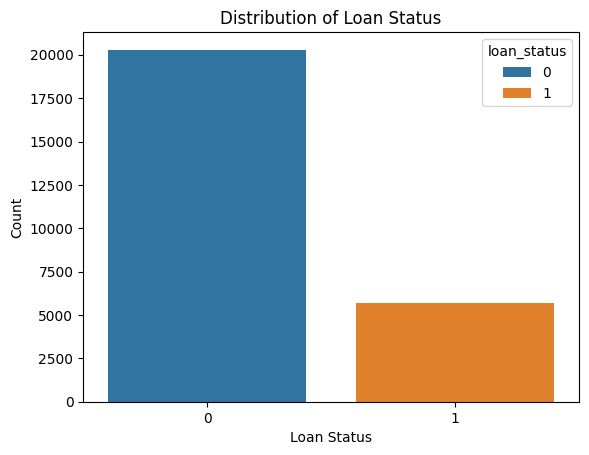

In [95]:
sns.countplot(data = pd.DataFrame(y_train_prep), x = 'loan_status', hue = 'loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show

In [96]:
print(type(y_train_prep))
print(y_train_prep[:5])  # Display the first 5 elements

<class 'pandas.core.series.Series'>
15884    0
15138    1
7474     0
18212    1
6493     0
Name: loan_status, dtype: int64


In [97]:
# Assuming y_train_prep is a pandas Series
y_train_df = pd.DataFrame(y_train_prep, columns=['Target'])

In [98]:
y_train_df.head()

,Target


In [99]:
y_train_df[y_train_df['Target'] == 0].count()

Target    0
dtype: int64

In [100]:
X_train_ros, y_train_ros= ros.fit_resample(X_train_prep, y_train_prep)

<function matplotlib.pyplot.show(close=None, block=None)>

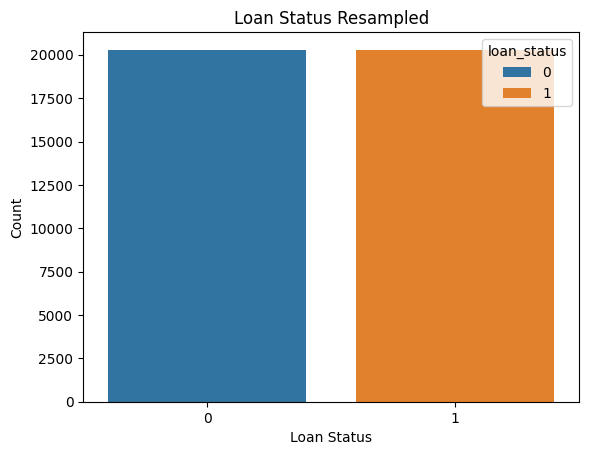

In [101]:
sns.countplot(data = pd.DataFrame(y_train_ros), x = 'loan_status', hue = 'loan_status')
plt.title('Loan Status Resampled')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show

In [102]:
directory = '../data/processed/'

utils.serialize_data(X_train_ros, directory +'X_train_ros.pkl')
utils.serialize_data(y_train_ros, directory +'y_train_ros.pkl')

In [103]:
PATH = '../data/processed/'

X_train_ros = utils.deserialize_data(PATH +'X_train_ros.pkl')
y_train_ros = utils.deserialize_data(PATH +'y_train_ros.pkl')

In [104]:
X_train_ros.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_on_file_N,default_on_file_Y
0,25,241875,4.0,16000,7.05,0.07,4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,18000,5.0,1500,12.18,0.08,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,53000,10.0,16000,12.53,0.30,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,16800,4.0,5000,13.98,0.30,8,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,50000,2.0,10000,7.90,0.20,2,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Model Evaluation

In [105]:
import xgboost
import sklearn
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

Load Dataset pkl

In [106]:
path = '../data/processed/'

X_train_ros = utils.deserialize_data(path +'X_train_ros.pkl')
y_train_ros = utils.deserialize_data(path +'y_train_ros.pkl')

X_valid = utils.deserialize_data(path +'X_valid_prep.pkl')
y_valid = utils.deserialize_data(path +'y_valid.pkl')

X_test = utils.deserialize_data(path +'X_test_prep.pkl')
y_test = utils.deserialize_data(path +'y_test.pkl')

In [107]:
X_train_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     40582 non-null  int64  
 1   person_income                  40582 non-null  int64  
 2   person_emp_length              40582 non-null  float64
 3   loan_amnt                      40582 non-null  int64  
 4   loan_int_rate                  40582 non-null  float64
 5   loan_percent_income            40582 non-null  float64
 6   cb_person_cred_hist_length     40582 non-null  int64  
 7   home_ownership_MORTGAGE        40582 non-null  float64
 8   home_ownership_OTHER           40582 non-null  float64
 9   home_ownership_OWN             40582 non-null  float64
 10  home_ownership_RENT            40582 non-null  float64
 11  loan_intent_DEBTCONSOLIDATION  40582 non-null  float64
 12  loan_intent_EDUCATION          40582 non-null 

In [108]:
y_train_ros.value_counts()

loan_status
0    20291
1    20291
Name: count, dtype: int64

Train Model

Define a function for training the model with parameters as follows:

- The model instance
- The list of hyperparameters
- The training data
- The target data

Create an instance for hyperparameter tuning.

- Assign the model instance to this hyperparameter tuning instance, so the model training includes hyperparameter tuning.
- Assign the list of parameters to this instance.
- Set the parameter n_jobs to -1 for this instance.
- Set the parameter verbose to 3 for this instance.

Train the model through the hyperparameter tuning instance.

Return the hyperparameter tuning instance from the function once training is completed.

In [109]:
def train_model(model, params, X_train, y_train):

    """
    Train a machine learning model using randomized hyperparameter search and evaluate its performance.

    Parameters:
    ----------
    model : sklearn-like estimator
        The machine learning model to be tuned and trained (e.g., RandomForestClassifier, LogisticRegression, etc.).
    params : dict
        A dictionary specifying the parameter distributions for the RandomizedSearchCV.
    X_train : array-like, shape (n_samples, n_features)
        The training feature dataset.
    y_train : array-like, shape (n_samples,)
        The ground truth labels for the training dataset.

    The best_model (accessible through random_search.best_estimator_).
    The best hyperparameters (random_search.best_params_).
    Cross-validation results (random_search.cv_results_).
    Other metadata related to the hyperparameter tuning process.

    """
    random_search = RandomizedSearchCV(estimator = model,
                                       param_distributions = params,
                                       n_iter = 50,
                                       scoring =  { 'F1': 'f1',
                                                    'accuracy': 'accuracy',
                                                    'Recall': 'recall'},
                                       n_jobs = -1,
                                       verbose = 3,
                                       cv = StratifiedKFold(n_splits = 5,
                                                            shuffle = True,
                                                            random_state = 50),
                                       refit = 'F1')
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    report = classification_report(y_train, y_pred,output_dict= True)
    report_df = pd.DataFrame(report).transpose()


    print(f'Best Parameters: {random_search.best_params_}')
    print(f'Best Score: {random_search.best_score_}')
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Classification Report:')
    print(report_df)
    return best_model

Logistic Regression

In [110]:
log_reg_params_1 = {
    'penalty': ['l1', 'l2'],  # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100,1000],               # Regularization strength
    'solver': ['liblinear', 'saga'],                 # Solvers
    'max_iter': [60,100, 200],   # Maximum iterations
    'random_state': [50]
}

log_reg_model = LogisticRegression(random_state = 50 , n_jobs = -1)
log_reg_best = train_model(log_reg_model, log_reg_params_1, X_train_ros, y_train_ros)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Best Parameters: {'solver': 'liblinear', 'random_state': 50, 'penalty': 'l1', 'max_iter': 200, 'C': 1}
Best Score: 0.7937769892971536
F1 Score: 0.7938796602051876
Accuracy: 0.7985067271203982
Recall: 0.7760583509930511
Classification Report:
              precision    recall  f1-score       support
0              0.785681  0.820955  0.802931  20291.000000
1              0.812539  0.776058  0.793880  20291.000000
accuracy       0.798507  0.798507  0.798507      0.798507
macro avg      0.799110  0.798507  0.798405  40582.000000
weighted avg   0.799110  0.798507  0.798405  40582.000000


Random Forest

In [111]:
random_forest_params = {
               'n_estimators': [100,200,300],
               'max_depth': [5,10,15],
               'min_samples_leaf':[10,20],
               'min_samples_split' :[20,30],
               'criterion':['gini','entropy'],
               'class_weight' : [{0: 1, 1: 2}],
               'random_state' : [50]}
random_forest = RandomForestClassifier(random_state = 50, n_jobs = -1)
random_forest_best = train_model(random_forest, random_forest_params, X_train_ros, y_train_ros)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'random_state': 50, 'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'gini', 'class_weight': {0: 1, 1: 2}}
Best Score: 0.8953428283915941
F1 Score: 0.9239945466939332
Accuracy: 0.9230693410871815
Recall: 0.9352422256172688
Classification Report:
              precision    recall  f1-score       support
0              0.933626  0.910896  0.922121  20291.000000
1              0.913014  0.935242  0.923995  20291.000000
accuracy       0.923069  0.923069  0.923069      0.923069
macro avg      0.923320  0.923069  0.923058  40582.000000
weighted avg   0.923320  0.923069  0.923058  40582.000000


Decision Tree

In [112]:
decision_tree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [10,20,30],
    'criterion': ['gini', 'entropy'],
    'class_weight' : [{0: 1, 1: 2}],
    'random_state': [50]
}
decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree_best = train_model(decision_tree, decision_tree_params, X_train_ros, y_train_ros)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'random_state': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini', 'class_weight': {0: 1, 1: 2}}
Best Score: 0.8774382403465493
F1 Score: 0.9005592492139308
Accuracy: 0.8979104036272239
Recall: 0.9245478290867872
Classification Report:
              precision    recall  f1-score      support
0              0.920302  0.871273  0.895117  20291.00000
1              0.877784  0.924548  0.900559  20291.00000
accuracy       0.897910  0.897910  0.897910      0.89791
macro avg      0.899043  0.897910  0.897838  40582.00000
weighted avg   0.899043  0.897910  0.897838  40582.00000


ADABoost

In [113]:
base_estimator = DecisionTreeClassifier(max_depth=15,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        class_weight = {0: 1, 1: 2},
                                        max_features='sqrt', random_state=50)

adaboost_params = {
    'n_estimators': [700],  # Number of estimators
    'learning_rate': [0.01],  # Learning rate
    'estimator': [base_estimator],  # Base estimator
    'algorithm': ['SAMME'],  # Algorithms
    'random_state': [50]  # Random state for reproducibility
}

# Initialize the AdaBoost classifier with the base estimator
adaboost = AdaBoostClassifier(random_state=50)
adaboost_best = train_model(adaboost, adaboost_params, X_train_ros, y_train_ros)

c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Best Parameters: {'random_state': 50, 'n_estimators': 700, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=15,
                       max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=20, random_state=50), 'algorithm': 'SAMME'}
Best Score: 0.9525250410743237
F1 Score: 0.9853668134084258
Accuracy: 0.9853383273372431
Recall: 0.9872850032033906
Classification Report:
              precision    recall  f1-score       support
0              0.987235  0.983392  0.985310  20291.000000
1              0.983456  0.987285  0.985367  20291.000000
accuracy       0.985338  0.985338  0.985338      0.985338
macro avg      0.985346  0.985338  0.985338  40582.000000
weighted avg   0.985346  0.985338  0.985338  40582.000000


XGBoost

In [114]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SklearnXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = XGBClassifier(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

xgb = SklearnXGBClassifier(random_state=50, eval_metric = 'logloss')

In [118]:
#xgboost_params = {
#    'n_estimators': [100,200],
#    'max_depth': [3,5,7],
#    'learning_rate': [0.05, 0.1],   # Test lower learning rates for smoother convergence
#    'scale_pos_weight': [2],
#    'random_state': [50]
#}

#xgboost = XGBClassifier(random_state=50, eval_metric = 'logloss')
#xgboost_best = train_model(xgboost, xgboost_params, X_train_ros, y_train_ros)

# Hyperparameters
xgboost_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__scale_pos_weight': [2],
    'model__random_state': [50]
}

# Train the model using your custom wrapper
xgboost_best = train_model(xgb, xgboost_params, X_train_ros, y_train_ros)

c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Admin\Documents\project\Hisyam\CreditRisk\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators", "model__random_state", "model__scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'model__scale_pos_weight': 2, 'model__random_state': 50, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.05}
Best Score: 0.9278091549242606
F1 Score: 0.9569397256826475
Accuracy: 0.9578384505445764
Recall: 0.9369671282834754
Classification Report:
              precision    recall  f1-score       support
0              0.939493  0.978710  0.958700  20291.000000
1              0.977782  0.936967  0.956940  20291.000000
accuracy       0.957838  0.957838  0.957838      0.957838
macro avg      0.958638  0.957838  0.957820  40582.000000
weighted avg   0.958638  0.957838  0.957820  40582.000000


In [120]:
import pickle

def serialize_data(obj, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(obj, f)

# Serialize models
serialize_data(log_reg_best, path + 'log_reg_best.pkl')
serialize_data(random_forest_best, path + 'random_forest_best.pkl')
serialize_data(xgboost_best, path + 'xgboost_best.pkl')
serialize_data(decision_tree_best, path + 'decision_tree_best.pkl')
serialize_data(adaboost_best, path + 'adaboost_best.pkl')


In [121]:
path = '../models/' 

log_reg_best = utils.deserialize_data(path +'log_reg_best.pkl')
rf_best = utils.deserialize_data(path +'random_forest_best.pkl')
xgb_best = utils.deserialize_data(path +'xgboost_best.pkl')
adaboost_best = utils.deserialize_data(path +'adaboost_best.pkl')
dtc_best = utils.deserialize_data(path +'decision_tree_best.pkl')

Validation Score

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def validate_model(model, X_valid, y_valid):
    
    """
    Validate the performance of a classification model on a validation dataset.

    Parameters:
    ----------
    model : sklearn-like model
        A trained machine learning model that implements the `predict` method.
    X_valid : array-like, shape (n_samples, n_features)
        The validation feature dataset.
    y_valid : array-like, shape (n_samples,)
        The ground truth labels for the validation dataset.

    Returns:
    -------
    confusion_matrix_df : pandas.DataFrame
        A confusion matrix represented as a DataFrame with labeled rows and columns.

    Prints:
    -------
    - Precision Score: The ratio of correctly predicted positive observations to the total predicted positive observations.
    - Recall Score: The ratio of correctly predicted positive observations to all actual positive observations.
    - F1 Score: The harmonic mean of precision and recall.
    - Accuracy Score: The ratio of correctly predicted observations to the total observations.
    - Confusion matrix: A labeled DataFrame showing the counts of True Positives, True Negatives, False Positives, and False Negatives.
    """
    
    valid_pred = model.predict(X_valid)
    cm = confusion_matrix(y_valid, valid_pred)
    confusion_matrix_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"],
                              index=["Actual Negative", "Actual Positive"])

    y_valid_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_valid_pred)
    precision = precision_score(y_valid, y_valid_pred)
    recall = recall_score(y_valid, y_valid_pred)
    f1 = f1_score(y_valid, y_valid_pred)

    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Accuracy Score: {accuracy}')
    print(confusion_matrix_df)

    return confusion_matrix_df

In [123]:
log_reg_matrix = validate_model(log_reg_best, X_valid, y_valid)

Precision Score: 0.5393700787401575
Recall Score: 0.770745428973277
F1 Score: 0.6346265199768385
Accuracy Score: 0.8063228974831185
                 Predicted Negative  Predicted Positive
Actual Negative                2079                 468
Actual Positive                 163                 548


In [124]:
rf_matrix= validate_model(random_forest_best, X_valid, y_valid)

Precision Score: 0.6662883087400681
Recall Score: 0.8255977496483825
F1 Score: 0.7374371859296482
Accuracy Score: 0.8717004297114794
                 Predicted Negative  Predicted Positive
Actual Negative                2253                 294
Actual Positive                 124                 587


In [125]:
dtc_matrix = validate_model(decision_tree_best, X_valid, y_valid)

Precision Score: 0.5803212851405622
Recall Score: 0.8129395218002813
F1 Score: 0.677211482132396
Accuracy Score: 0.830877839165132
                 Predicted Negative  Predicted Positive
Actual Negative                2129                 418
Actual Positive                 133                 578


adaboost_matrix = validate_model(adaboost_best, X_valid, y_valid)

In [127]:
adaboost_matrix = validate_model(adaboost_best, X_valid, y_valid)

Precision Score: 0.7994310099573257
Recall Score: 0.790436005625879
F1 Score: 0.7949080622347949
Accuracy Score: 0.910988336402701
                 Predicted Negative  Predicted Positive
Actual Negative                2406                 141
Actual Positive                 149                 562


In [128]:
xgb_matrix = validate_model(xgboost_best, X_valid, y_valid)

Precision Score: 0.8586309523809523
Recall Score: 0.8115330520393812
F1 Score: 0.8344179320318149
Accuracy Score: 0.9297114794352364
                 Predicted Negative  Predicted Positive
Actual Negative                2452                  95
Actual Positive                 134                 577


Threshold Evaluation

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

def threshold_tuning(model, valid_data, valid_target):
    """
    Perform threshold tuning for a trained model using validation data.

    This function predicts the probabilities for the validation data and loops through
    thresholds from 0 to 1 (in 100 steps) to calculate the F1 metric. It stores the
    results in a dictionary structure for plotting metrics vs. thresholds.

    Parameters:
    ----------
    model : sklearn model
        Trained model for which threshold tuning will be performed.
    valid_data : pd.DataFrame or np.array
        Validation data features (X_valid).
    valid_target : pd.Series or np.array
        Validation data target labels (y_valid).

    Returns:
    --------
    thresholds : list of dict
        List of dictionaries containing model name, threshold, and F1 score.
    """

    # Predict probabilities for the validation data
    y_valid_pred = model.predict_proba(valid_data)
    y_probs = y_valid_pred[:,1]

    # Get model name
    model_name = type(model).__name__

    # Initialize the list to store threshold metrics
    thresholds = []

    # Loop through thresholds from 0 to 1 in 100 steps
    for threshold in np.arange(0, 1.01, 0.01):
        # Apply threshold to convert probabilities to binary predictions
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate the F1 score
        f1 = f1_score(valid_target, y_pred)

        # Store the result in a dictionary
        thresholds.append(
            {'model': model_name,
            'threshold': threshold,
            'metric': f1}
            )

    threshold_df = pd.DataFrame(thresholds)

    # Plot F1 score vs threshold using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=threshold_df, x='threshold', y='metric', label='F1 Score')
    plt.title(f'F1 Score vs Threshold ({model_name})')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)  # To add a grid to the plot
    plt.show()

    return thresholds

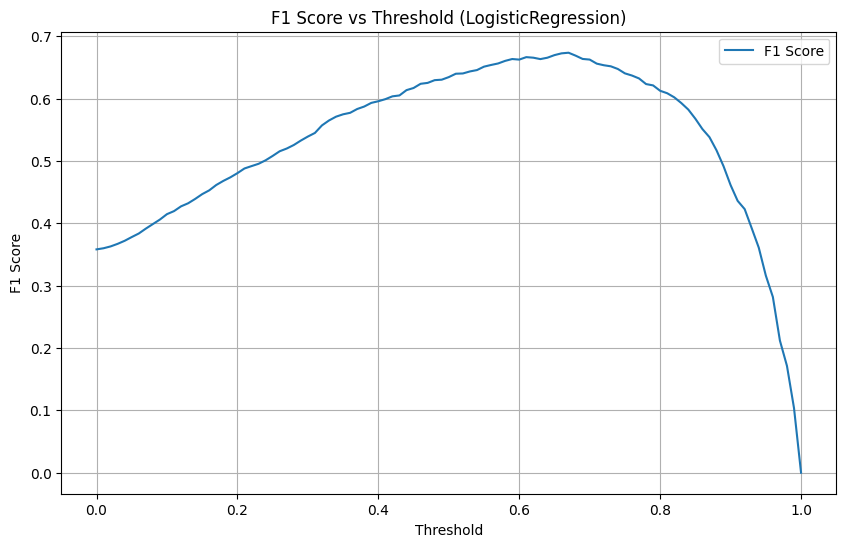

In [130]:
log_reg_thres = threshold_tuning(log_reg_best, X_valid, y_valid)

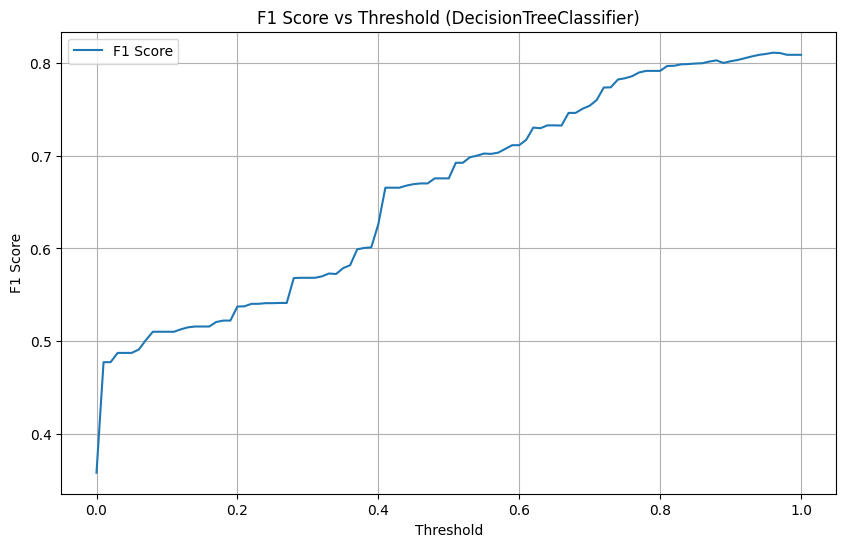

In [131]:
dtc_thresh = threshold_tuning(dtc_best, X_valid, y_valid)

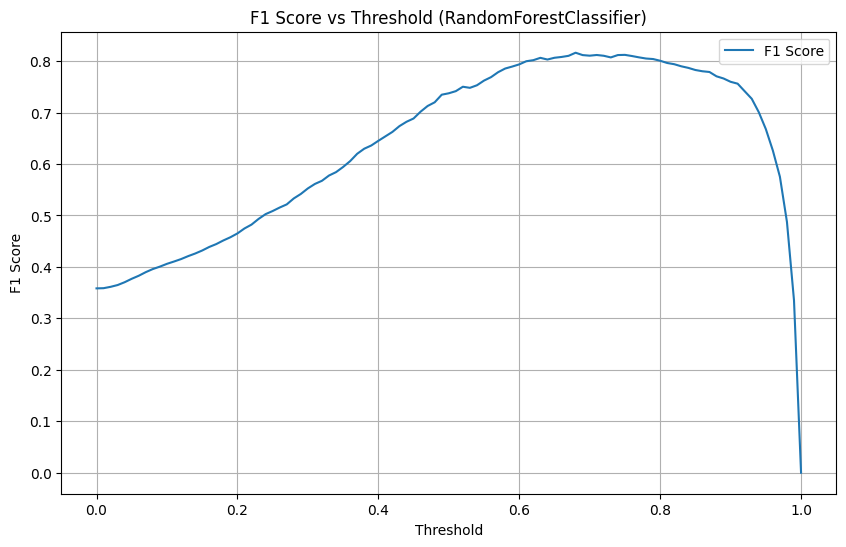

In [132]:
random_forest_thresh = threshold_tuning(rf_best, X_valid, y_valid)

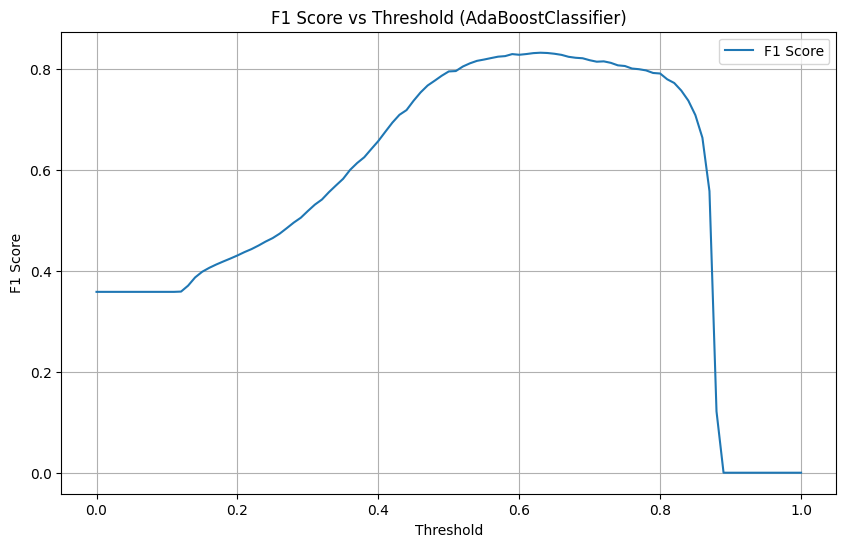

In [133]:
adaboost_thresh = threshold_tuning(adaboost_best, X_valid, y_valid)

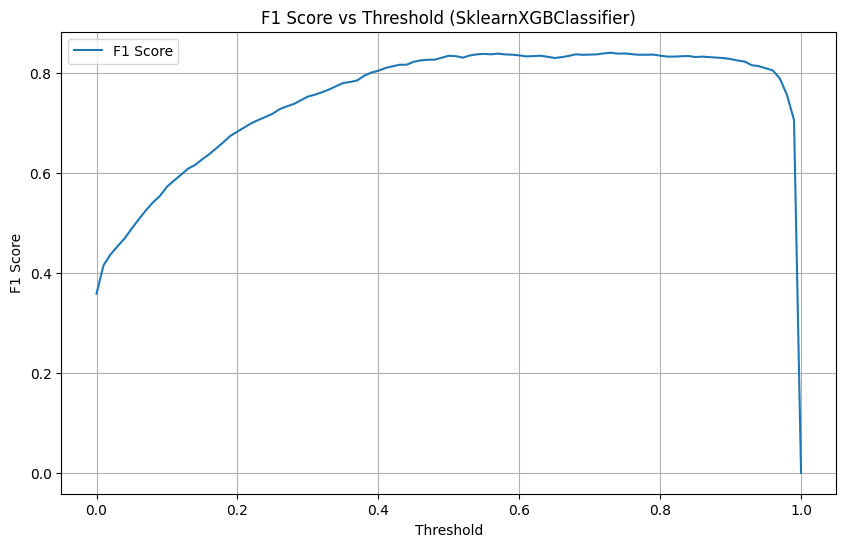

In [134]:
xgb_thresh = threshold_tuning(xgb_best, X_valid, y_valid)

Best Threshold

In [135]:
import json

def best_threshold(model_threshold, path):


    threshold_df = pd.DataFrame(model_threshold).sort_values(by = 'metric', ascending = False).reset_index(drop = True)
    best_threshold = threshold_df.iloc[0]
    result = best_threshold.to_json(orient="records")

    #Extract Model name
    model_name = model_threshold[0]['model']

    # Save the JSON to the specified path
    with open(f"{path}best_threshold_{model_name}.json", "w") as json_file:
        json_file.write(result)

    print(f"Best threshold saved at: {path}best_threshold_{model_name}.json")
    return best_threshold


In [136]:
path = '../models/'

adb_best_thresh = best_threshold(adaboost_thresh, path)   # change the model best threshold and path accordingly
rf_best_thresh = best_threshold(random_forest_thresh, path)
xgb_best_thresh = best_threshold(xgb_thresh, path)

Best threshold saved at: ../models/best_threshold_AdaBoostClassifier.json
Best threshold saved at: ../models/best_threshold_RandomForestClassifier.json
Best threshold saved at: ../models/best_threshold_SklearnXGBClassifier.json


Test Models

In [137]:
def evaluate_model(best_model, X_test, y_test, best_threshold):
    best_model_name = type(best_model).__name__
    y_test_prob = best_model.predict_proba(X_test)
    threshold_value = best_threshold['threshold']
    y_test_pred = (y_test_prob[:, 1] >= threshold_value).astype(int)

    report = classification_report(y_test, y_test_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"],
                              index=["Actual Negative", "Actual Positive"])

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)


    print(f'Best Threshold: {threshold_value}')
    print()
    print(report_df)
    print()
    print(f'Model Name: {best_model_name}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Accuracy Score: {accuracy}')
    print()
    print(confusion_matrix_df)
    return

ADABoost

In [144]:
evaluate_model(adaboost_best, X_test, y_test, adb_best_thresh)

Best Threshold: 0.63

              precision    recall  f1-score      support
0              0.924115  0.994113  0.957837  2548.000000
1              0.971042  0.707454  0.818552   711.000000
accuracy       0.931574  0.931574  0.931574     0.931574
macro avg      0.947579  0.850784  0.888194  3259.000000
weighted avg   0.934353  0.931574  0.927450  3259.000000

Model Name: AdaBoostClassifier
Precision Score: 0.971042471042471
Recall Score: 0.7074542897327707
F1 Score: 0.8185516680227828
Accuracy Score: 0.9315741024854249

                 Predicted Negative  Predicted Positive
Actual Negative                2533                  15
Actual Positive                 208                 503


In [147]:
from sklearn.pipeline import Pipeline
joblib.dump(adaboost_best, "model.pkl")

['model.pkl']

XGBoost

In [139]:
path =  '../models/'

evaluate_model(xgb_best, X_test, y_test, xgb_best_thresh)

Best Threshold: 0.73

              precision    recall  f1-score      support
0              0.929334  0.990973  0.959164  2548.000000
1              0.957565  0.729958  0.828412   711.000000
accuracy       0.934029  0.934029  0.934029     0.934029
macro avg      0.943449  0.860466  0.893788  3259.000000
weighted avg   0.935493  0.934029  0.930639  3259.000000

Model Name: SklearnXGBClassifier
Precision Score: 0.9575645756457565
Recall Score: 0.729957805907173
F1 Score: 0.8284118116520351
Accuracy Score: 0.9340288432034366

                 Predicted Negative  Predicted Positive
Actual Negative                2525                  23
Actual Positive                 192                 519


Random Forest

In [140]:
path =  '../models/'

evaluate_model(rf_best, X_test, y_test, rf_best_thresh)

Best Threshold: 0.68

              precision    recall  f1-score      support
0              0.925473  0.979592  0.951764  2548.000000
1              0.907473  0.717300  0.801257   711.000000
accuracy       0.922369  0.922369  0.922369     0.922369
macro avg      0.916473  0.848446  0.876510  3259.000000
weighted avg   0.921546  0.922369  0.918928  3259.000000

Model Name: RandomForestClassifier
Precision Score: 0.9074733096085409
Recall Score: 0.7172995780590717
F1 Score: 0.8012568735271013
Accuracy Score: 0.9223688247928813

                 Predicted Negative  Predicted Positive
Actual Negative                2496                  52
Actual Positive                 201                 510


In [ ]:
#import joblib

# Simpan model (misalnya, menggunakan joblib)
#joblib.dump(xgb_best, "model.pkl")


['model.pkl']

In [143]:
from sklearn.pipeline import Pipeline
joblib.dump(rf_best, "model.pkl")


['model.pkl']